In [2]:
import wordcloud # pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
autovec = []

with open("../analysis/potencia", 'r') as pot:
    for line in pot:
        if line.find("autovec") != -1:
            line = line[line.find("autovec") + 8:]
            dim = int(line[2:line.find(";")])
            line = line[line.find(";")+1:]
            line = line[:-2]
            line = line.strip().split(",")
            autovec.append(line)

In [4]:
df = pd.read_csv('../data/vocab.csv')
df = df[df.document_frequency < 0.1][df.document_frequency > 0.01]
canonico = []

for _,r in df.iterrows():
#     print(r['word'])
    canonico.append(r['word'])

def deBoW(vec, signo = lambda x : x):
    ans = {}
    for x in range(len(vec)):
        ans[canonico[x]] = signo((float(vec[x])) )
    return ans

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [5]:
freq = [deBoW(x, lambda x : x) for x in autovec]
# len(autovec[0])

In [6]:
train = pd.read_csv('../data/imdb_dataset.csv')
positivity = {}
for idx, r in train.iterrows():
    label = (r.label == 'pos')
    for w in r.review.split():
        if w in freq[0]:
            if w not in positivity:
                positivity[w] = 0.0
            positivity[w] += 1.0 if label else -1.0
maxPos = 0
minPos = 0
for w, p in positivity.items():
    maxPos = max(maxPos, p)
    minPos = min(minPos, p)

for w, p in positivity.items():
    if p > 0:
        positivity[w] = (p/(2.0*maxPos)) + 0.5
    else:
        positivity[w] = 0.5 - (p/(minPos*2.0))
#     positivity[w] = (p - minPos)/(-minPos + maxPos)

In [7]:
def colorF(word,*args, **kwargs):
#     print(word)
    if word is None or word not in positivity:
        return 'black'
    w = word
    pos = float(positivity[w])
#     if pos > 0:
#         return (0, 0, int((pos / maxPos)*255))
#     else:
#         return (int((pos/minPos)*255), 0, 0)
#     pos = pos/(-minPos + maxPos)
    return (int((1-pos)*255), 0, int((pos)*255))

In [28]:
positivity

{'limited': 10.0,
 'child': 85.0,
 'four': 49.0,
 'sleep': -85.0,
 'hate': -223.0,
 'consider': 25.0,
 'relationships': 163.0,
 'whose': 302.0,
 'paris': -4.0,
 'whatsoever': -142.0,
 'under': 11.0,
 'sorry': -421.0,
 'worth': 235.0,
 'jack': 3.0,
 'school': -112.0,
 'wooden': -310.0,
 'clothes': -88.0,
 'enjoy': 539.0,
 'force': 32.0,
 'tired': -151.0,
 'direct': -22.0,
 'second': 204.0,
 'street': 59.0,
 'blue': 2.0,
 'above': 100.0,
 'dr.': 6.0,
 'poorly': -993.0,
 'disney': -3.0,
 'told': 173.0,
 'hero': -112.0,
 'men': 264.0,
 'met': 79.0,
 'studio': 28.0,
 'cult': 9.0,
 '100': -32.0,
 'kids': -129.0,
 'daughter': -17.0,
 'leaves': 121.0,
 'changed': 48.0,
 'credit': -12.0,
 'military': -52.0,
 'changes': 71.0,
 'fantastic': 621.0,
 'feelings': 251.0,
 'brought': 341.0,
 'moral': 87.0,
 'total': -452.0,
 'army': -8.0,
 'hospital': 45.0,
 'movie.': -1483.0,
 'negative': 29.0,
 'music': 1001.0,
 'therefore': -25.0,
 'recommend': 714.0,
 'type': 38.0,
 'until': 276.0,
 'successful': 

In [39]:
positivity

{'limited': 0.5027502750275028,
 'child': 0.5233773377337734,
 'four': 0.5134763476347635,
 'sleep': 0.4887566137566138,
 'hate': 0.4705026455026455,
 'consider': 0.5068756875687569,
 'relationships': 0.5448294829482948,
 'whose': 0.583058305830583,
 'paris': 0.49947089947089945,
 'whatsoever': 0.4812169312169312,
 'under': 0.503025302530253,
 'sorry': 0.4443121693121693,
 'worth': 0.5646314631463146,
 'jack': 0.5008250825082509,
 'school': 0.48518518518518516,
 'wooden': 0.458994708994709,
 'clothes': 0.4883597883597884,
 'enjoy': 0.6482398239823982,
 'force': 0.5088008800880088,
 'tired': 0.480026455026455,
 'direct': 0.4970899470899471,
 'second': 0.5561056105610561,
 'street': 0.5162266226622663,
 'blue': 0.5005500550055005,
 'above': 0.5275027502750275,
 'dr.': 0.5016501650165016,
 'poorly': 0.3686507936507937,
 'disney': 0.4996031746031746,
 'told': 0.5475797579757976,
 'hero': 0.48518518518518516,
 'men': 0.5726072607260726,
 'met': 0.5217271727172718,
 'studio': 0.5077007700770

In [81]:
wc = wordcloud.WordCloud( width = 1000, height = 1000, max_words = 350, margin = 1,
                         color_func=colorF)

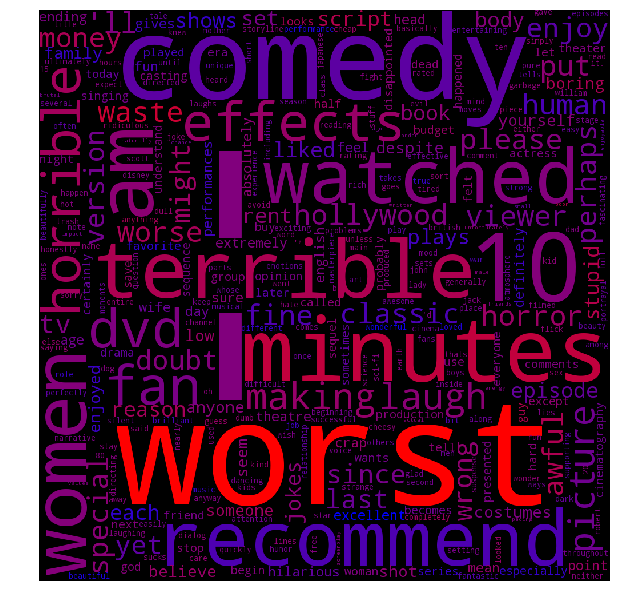

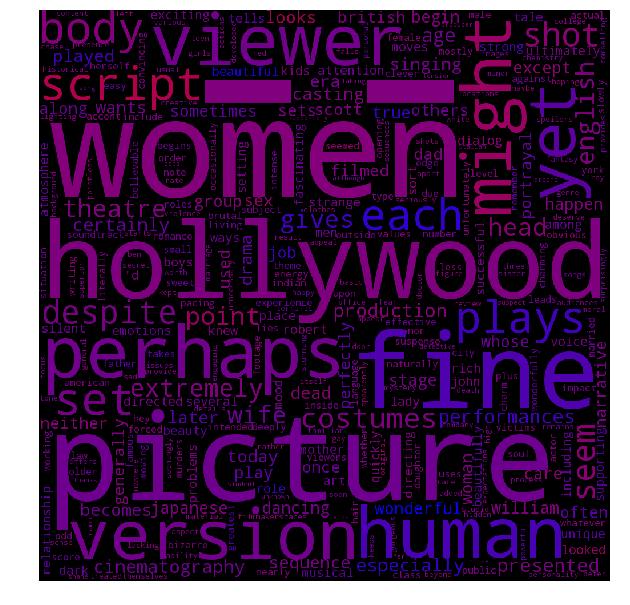

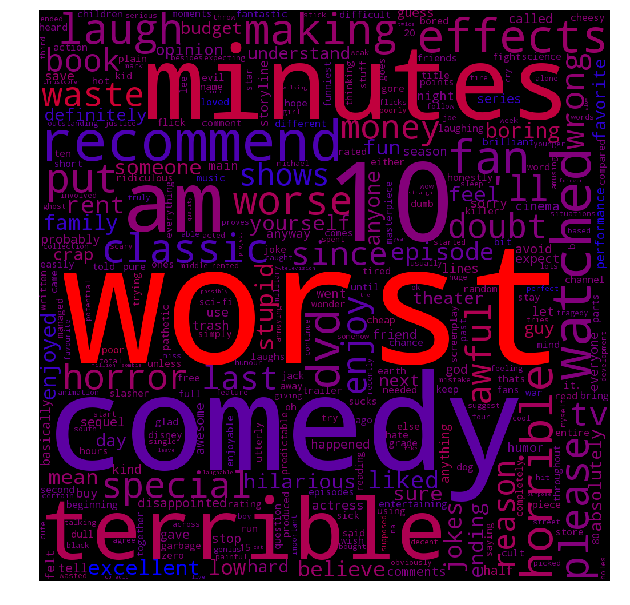

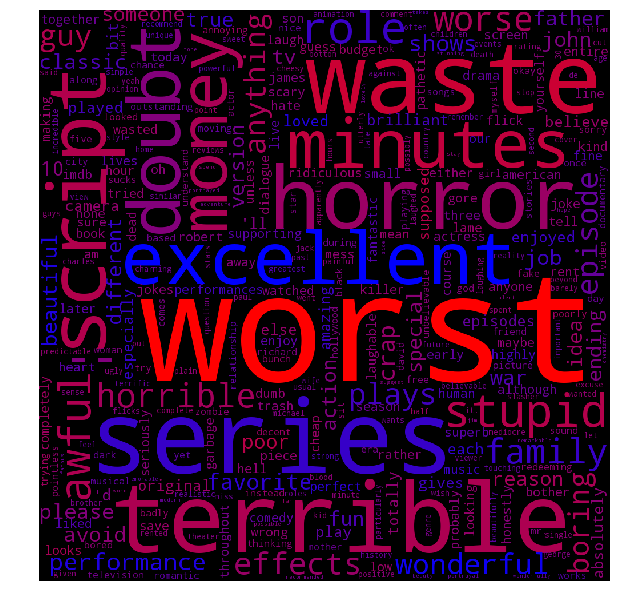

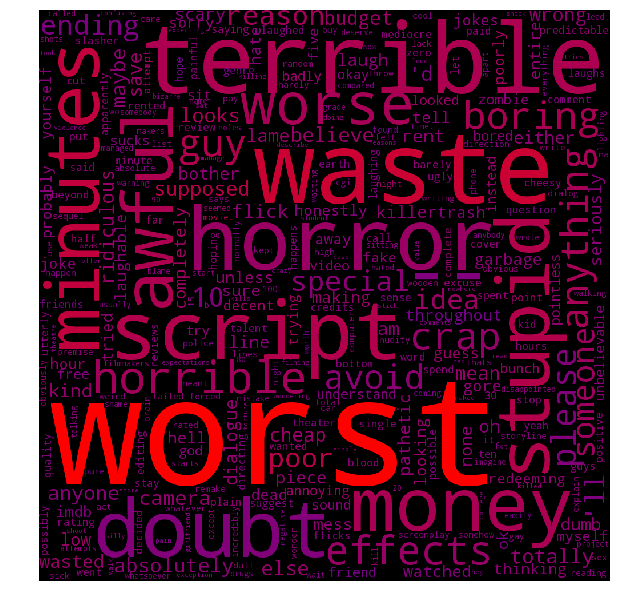

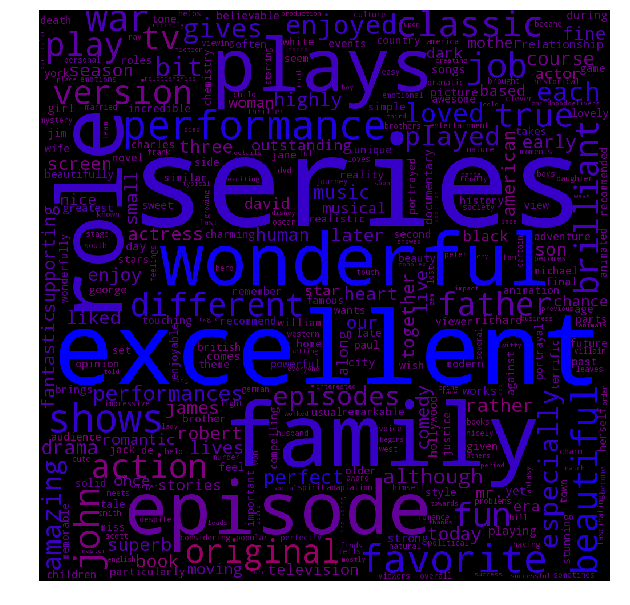

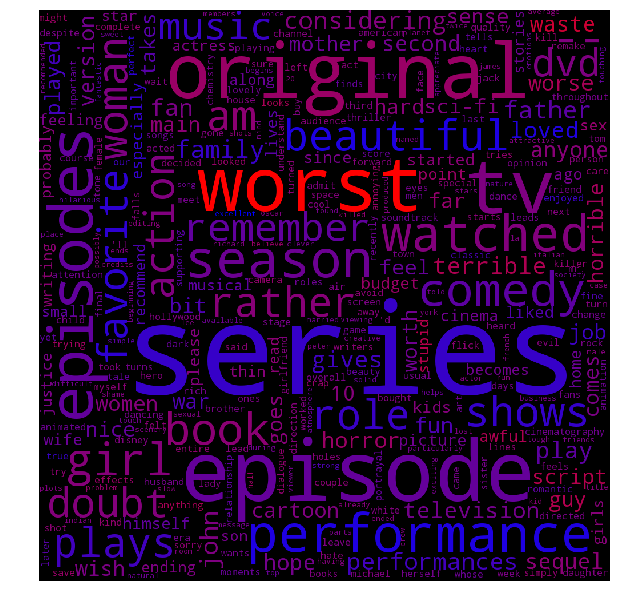

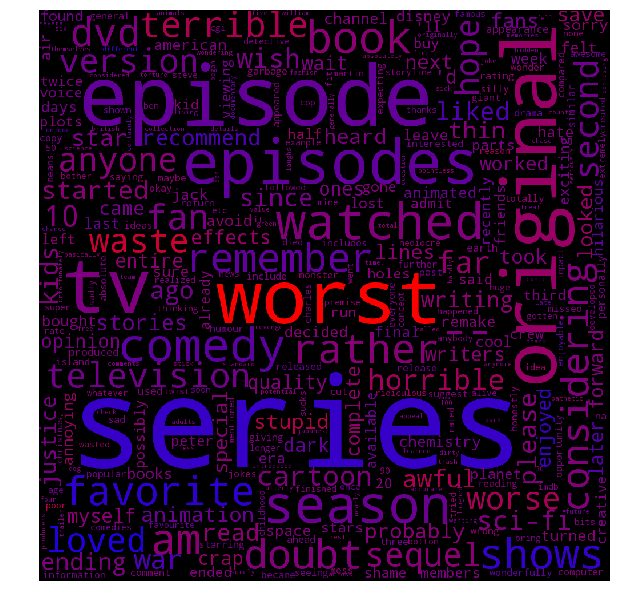

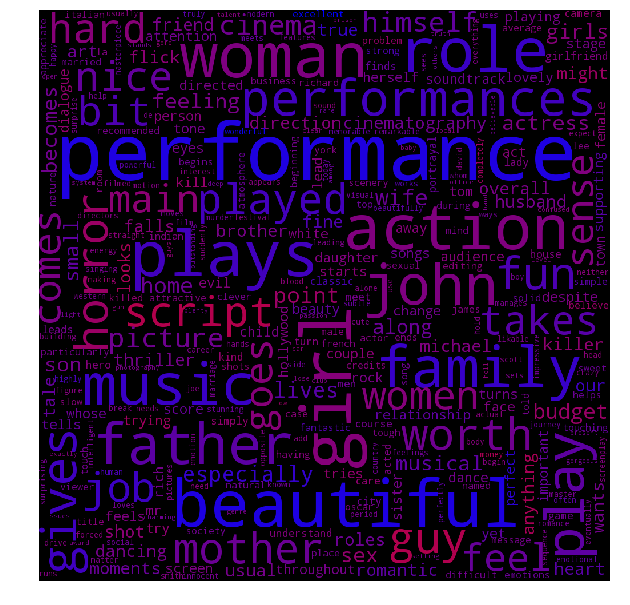

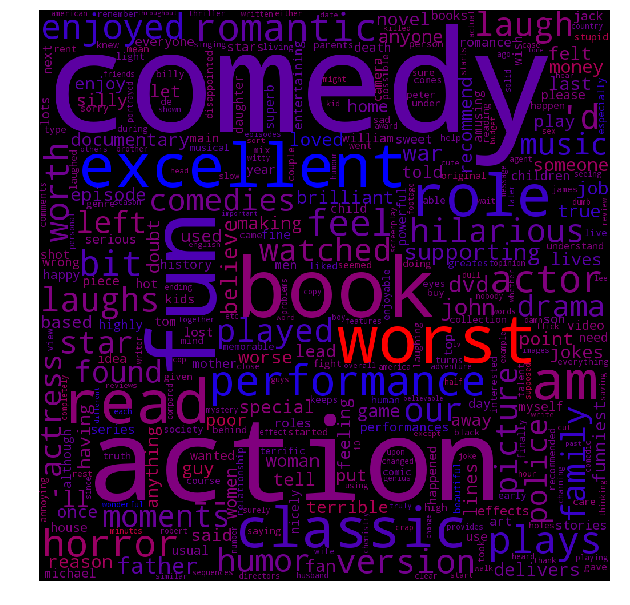

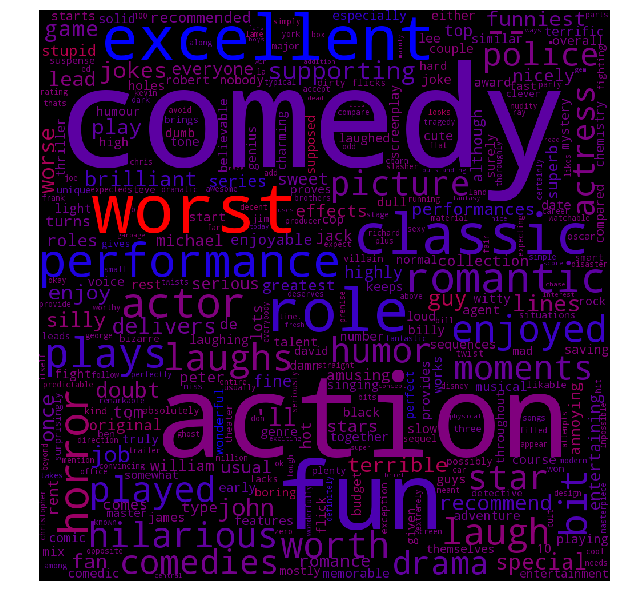

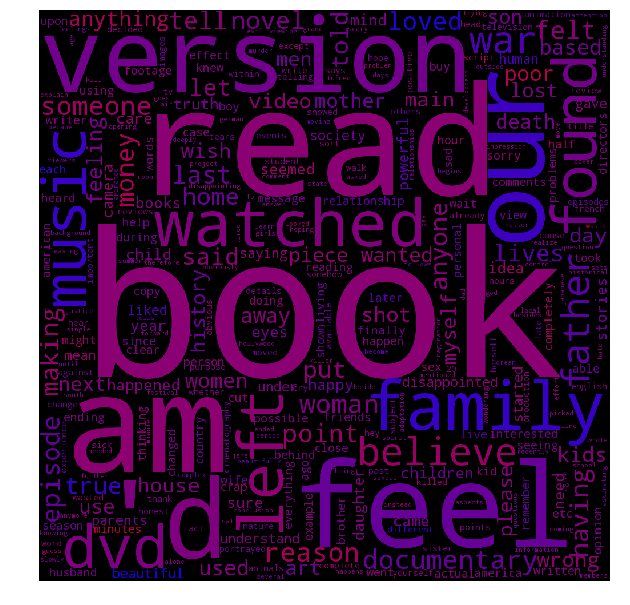

In [113]:
for eigv in [0, 1, 2, 3]:
    for (sgn, sgnf) in [('abs', abs), ('+', lambda x : x), ('-', lambda x : -x)]:
        wc.generate_from_frequencies(deBoW(autovec[eigv], sgnf))
        fig, axes = plt.subplots(1, 1)
        fig.set_size_inches(10.5, 10.5)
        axes.imshow(wc)
        axes.set_axis_off()
        plt.savefig('img/wcloud-{}-{}'.format(eigv, sgn))
        plt.show()

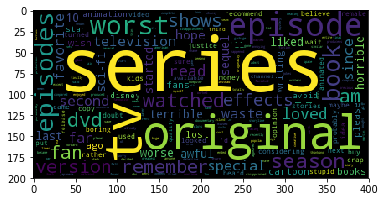

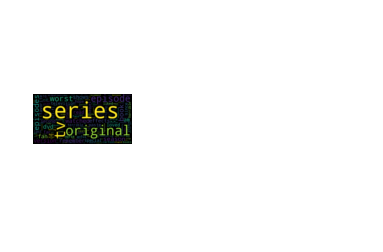

In [97]:
# image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
# axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

In [161]:
abs(-1.5)

1.5

In [107]:
for idx, r in train.iterrows():
    if '--' in r.review and len(r.review) < 500:
        print(r.review)
        print('------------------')

New York family is the last in their neighborhood to get a television set, which nearly ruins David Niven's marriage to Mitzi Gaynor. Bedroom comedy that rarely ventures into the bedroom(and nothing sexy happens there anyway). Gaynor as an actress has about as much range as an oven--she turns on, she turns off. Film's sole compensation is a supporting performance by perky Patty Duke, pre-"Miracle Worker", as Niven's daughter. She's delightful; "Happy Anniversary" is not. * from ****
------------------
He's the only reason to see this film. He gives a very good performance--much better than this crap deserves. He's very handsome and very talented--he deserves better than this. Also depressing is to see Malcolm McDowell in this. He's another talented actor who deserves better but, like Esai, he gives a very good performance. So, if you're fans of either of them you might want to watch. Otherwise, stay away. One more complaint--couldn't we have had more scenes of Esai shirtless?
---------

In my opinion, the movie was laughable--bad dialogue. Whoever wrote the script--please keep your day job. It's definitely NO Godfather or Goodfellas. It's good to be on the otherside of the table--poor choice of words. Some of the characters were clowns. But what do you expect from a low budget movie with no name actors.
------------------
The opening credits are pure poetry and I have watched it several times. It had a corny 20's adventure feel to it. Of course Kathy is gorgeous, but that voice! Did she realize this was a talkie. One word--voice coach. Great film for chronic insomnia (along with a bottle of scotch).
------------------
I really enjoyed the film. It was really cheesy at times. (They destroy the villain with hair driers--but where are they plugged in?) It's a unique film though, and I enjoyed the acting of Courtney Draper and Tamara Hope. I also enjoyed Fanuel (however you write it...) liking Megan's charecter because she called him a dweeb. Besides the acting, the "rewi

I don't even like watching those late night talk shows, but I found this one really interesting. I imagine it's probably close to the truth---it "feels" like an honest account, if that means anything. Kinda feel for the people somewhat when you watch it. A nice movie for a Saturday night.
------------------
Looking for proof that real life is more entertaining than fiction? You just found it. This superb documentary about an aspiring feature filmmaker (Mark Bortchart) who refuses to admit defeat is the funniest film I have ever seen -- probably because it's also one of the most tragic. Oddly enough, the more I watch the film the more inspired I become.
------------------
This is a beautiful, funny, vivid film. It's even better than "Nuovo Cinema Paradiso" -- which it parallels but doesn't replicate. The story completes a full circle and had the theater beaming as the credits rolled. A hundred years after this story takes place, we're just as intrigued by flickering images in a dark the

------------------
this is the only movie i have ever walked out on. bad acting-- bad plot-- bad casting-- bad directing-- bad cinematography-- if they had set out to make a bad picture they couldn't have done a better job. i hope they are proud of his turkey. i'm surprised anyone associated with this film was ever hired again in hollywood. don't waste your time!
------------------
---what happened to these unlikeable people. Alan Arkin was, as usual, unfunny and just walks through the role. The kids are all a mess. Mariesa Tomei probably wishes this role had never come her way. And what are Carl Reiner and Rita Moreno doing in this really bad, mean movie? If you enjoy watching losers wallow in their disfunction, and not try in any way to do better, this is your film. All others, take a walk, read a book, or see something else.<br /><br />Jane
------------------
This movie is another fine example of what Jerry Bruckheimer, since about 1997, seems to be best at--hyping up a movie a year

------------------
This film may have a questionable pedigree because it was made for TV, but it is one of the best movies I've seen. The film and its actors won several awards. It is gripping, fascinating, and it will absorb you completely. The story of a chase for a killer in iron-curtain Russia by people who are willing to risk their careers to try to save lives of future victims would be a compelling story if it were fiction -- but it's ostensibly a true story. I highly recommend it.
------------------
The filmmaker inhaled Andy Goldsworthy's art, his search for closeness with the land and the water, and his sense of proportion -- and so gently, so beautifully breathed it back on to film for the rest of us. "Rivers and Tides" loves Goldsworthy's work and joins it as a visual concert of time and human presence in a flowing world, a world that hides its power in plain sight. See this movie!
------------------
Magicians is a wonderful ride from start to finish, thanks in large part to

This film may seem dated today, but remember that it was made in 1974 -- before Saturday Night Live, before Howard Stern, back when George Carlin was just getting beyond the Hippie Dippie Weatherman and into heavy satiric humor. This film is the granddaddy of them all. Enjoy it for its historical significance, as well as for its strong entertainment value.
------------------
Ghost Story (the TV Movie--1972) was the pilot for the NBC series. The movie was well-written and well-acted and, I thought, when the 1972-73 tv season started, if the tv series is half as good as the movie, then NBC has a winner. (I wish this film was available on video!!) The series was a colossal disappointment--even with William Castle as exec. producer. If, however,you have a chance to see the original TV movie, Ghost Story, check it out. You won't be disappointed.
------------------
This is a great movie, I did the play a while ago. It had an extra zing-- to it. I loved Vanessa Williams as Rosey, and also Jas

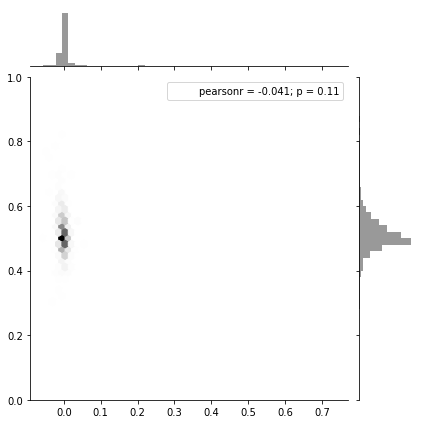

[1.0,
 0.9425192519251926,
 0.8844884488448845,
 0.8792629262926293,
 0.8737623762376238,
 0.8297579757975797,
 0.8228822882288229,
 0.8146314631463146,
 0.7973047304730473,
 0.7931793179317932,
 0.7929042904290429,
 0.7854785478547854,
 0.7808030803080308,
 0.7805280528052805,
 0.7753025302530253,
 0.7739273927392739,
 0.7700770077007701,
 0.7645764576457645,
 0.7629262926292629,
 0.7563256325632564,
 0.7541254125412542,
 0.7511001100110011,
 0.7425742574257426,
 0.7414741474147415,
 0.7343234323432344,
 0.7323982398239823,
 0.7224972497249725,
 0.7081958195819582,
 0.7026952695269527,
 0.7007700770077008,
 0.6963696369636964,
 0.6960946094609461,
 0.694994499449945,
 0.694994499449945,
 0.6897689768976898,
 0.6828932893289329,
 0.6798679867986799,
 0.6707920792079208,
 0.6683168316831684,
 0.6575907590759076,
 0.657040704070407,
 0.657040704070407,
 0.655940594059406,
 0.6523652365236523,
 0.6515401540154016,
 0.6512651265126512,
 0.6501650165016502,
 0.6482398239823982,
 0.648239823

In [57]:
x = deBoW(autovec[2]).values()
y = map(lambda (w, _) : positivity[w] if w in positivity else 0.5, deBoW(autovec[2]).items())
sns.jointplot(x, y, kind="hex", color="black", dropna = False)
plt.show()
sorted(y, key = lambda x : -x)

In [53]:
sorted(deBoW(autovec[0], lambda p : -p).items(), key = lambda p: p[1])

[('--', -0.976766),
 ('women', -0.0242743),
 ('picture', -0.0181123),
 ('hollywood', -0.0173862),
 ('fine', -0.0169873),
 ('perhaps', -0.0169075),
 ('viewer', -0.0165061),
 ('human', -0.0161769),
 ('version', -0.0155512),
 ('might', -0.01441),
 ('yet', -0.0138025),
 ('script', -0.0134161),
 ('set', -0.0130031),
 ('plays', -0.0127282),
 ('body', -0.0123683),
 ('each', -0.0120814),
 ('despite', -0.0118886),
 ('shot', -0.0117946),
 ('seem', -0.0115095),
 ('costumes', -0.011508),
 ('extremely', -0.0114923),
 ('english', -0.0113848),
 ('theatre', -0.0113619),
 ('gives', -0.0108675),
 ('wife', -0.0108494),
 ('point', -0.0106464),
 ('head', -0.010608),
 ('performances', -0.0105298),
 ('age', -0.01038),
 ('production', -0.0103721),
 ('presented', -0.0103276),
 ('especially', -0.0102456),
 ('cinematography', -0.0100908),
 ('certainly', -0.00993848),
 ('wants', -0.00961394),
 ('looks', -0.00960686),
 ('dead', -0.00956413),
 ('woman', -0.00953906),
 ('played', -0.00947973),
 ('era', -0.0094705),


In [20]:
pd.notnull(map(lambda (w, _) : positivity[w] if w in positivity else 0.5, deBoW(autovec[0]).items()))

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [17]:
positivity['hate']

0.4705026455026455